# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Для воспроизведения случайных последовательностей, чтобы результаты совпадали при каждом запуске`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
# Отобразите 30 случайных строк тренировочного датасета.
random_rows = np.random.randint(0, df_train.shape[0], 30)
df_train.loc[random_rows]

name  year  selling_price  \
860                            Renault KWID RXT  2016         330000   
5390                     Maruti Ertiga ZDI Plus  2017         825000   
5226                  Hyundai Xcent 1.2 VTVT SX  2020         524000   
5191                    Mahindra XUV500 W10 2WD  2015         850000   
3772             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
3092                 Toyota Innova 2.5 VX 7 STR  2010         515000   
5734    Skoda Rapid 1.6 TDI Ambition Plus Alloy  2012         380000   
6265  Toyota Innova 2.5 Z Diesel 7 Seater BS IV  2014         950000   
466                        Honda City i VTEC VX  2015         900000   
5334                   Maruti Vitara Brezza ZDi  2019         890000   
4426          Hyundai Grand i10 1.2 CRDi Sportz  2018         700000   
5578            Maruti Wagon R LXI CNG Optional  2019         459999   
6231                Maruti Baleno RS 1.0 Petrol  2019         780000   
3444                    Audi Q7 3.0 TDI Quattro  2010        1750000   
3171              Mahindra Bolero 2011-2019 SLE  2019         710000   
2919            Tata Manza Aura Quadrajet BS IV  2012         287000   
130              Audi Q7 35 TDI Quattro Premium  2015        2650000   
1685                   Maruti Esteem Vxi - BSII  2005          93000   
769             Mahindra Bolero DI Non AC BSIII  2010         320000   
2391           Tata New Safari DICOR 2.2 VX 4x2  2010         300000   
5611                 Toyota Innova 2.5 GX 8 STR  2012         610000   
6949                  Ford Figo Aspire Facelift  2017         580000   
2433                   Maruti Vitara Brezza ZDi  2018         875000   
5311                      Volvo V40 D3 R-Design  2018        2475000   
5051                             Maruti Zen LXI  2006         150000   
6420                       Ford Figo Diesel ZXI  2011         210000   
1184                         Maruti Wagon R VXI  2016         400000   
4555                 Hyundai i20 1.4 CRDi Magna  2011         350000   
3385                          Renault Pulse RxL  2013         315000   
4117                      Honda BRV i-DTEC V MT  2019        1100000   

      km_driven    fuel seller_type transmission         owner     mileage  \
860       20000  Petrol  Individual       Manual   First Owner  25.17 kmpl   
5390      79000  Diesel      Dealer       Manual   First Owner  25.47 kmpl   
5226      32000  Petrol  Individual       Manual   First Owner  20.14 kmpl   
5191     140000  Diesel  Individual       Manual   First Owner   16.0 kmpl   
3772      45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
3092     200000  Diesel  Individual       Manual   First Owner   12.8 kmpl   
5734     145000  Diesel  Individual       Manual   First Owner   20.5 kmpl   
6265      80000  Diesel      Dealer       Manual   First Owner  12.99 kmpl   
466       22000  Petrol  Individual       Manual   First Owner   17.4 kmpl   
5334       9000  Diesel  Individual       Manual   First Owner   24.3 kmpl   
4426      35000  Diesel  Individual       Manual   First Owner   24.0 kmpl   
5578      35000     CNG  Individual       Manual   First Owner  26.6 km/kg   
6231       7200  Petrol  Individual       Manual   First Owner   21.1 kmpl   
3444     110000  Diesel  Individual    Automatic  Second Owner  12.07 kmpl   
3171      30000  Diesel  Individual       Manual   First Owner  15.96 kmpl   
2919     120000  Diesel  Individual       Manual   First Owner  21.12 kmpl   
130       53000  Diesel      Dealer    Automatic   First Owner  12.07 kmpl   
1685     120000  Petrol  Individual       Manual   Third Owner         NaN   
769      300000  Diesel  Individual       Manual   Third Owner   13.6 kmpl   
2391     108957  Diesel  Individual       Manual   First Owner  13.93 kmpl   
5611      90000  Diesel  Individual       Manual   First Owner   12.8 kmpl   
6949     165000  Diesel  Individual       Manual   First Owner         NaN   
2433      50000 

In [5]:
# Отобразите первые 5...
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [6]:
# ...и последние 5 объектов тестового датасета
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [7]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения

def missing_columns(df) -> list:
    miss_values = df.isnull().any()
    return list(miss_values[miss_values].index)

print(missing_columns(df_train))
print(missing_columns(df_test))

['mileage', 'engine', 'max_power', 'torque', 'seats']
['mileage', 'engine', 'max_power', 'torque', 'seats']


In [8]:
# Посмотрите, есть ли в данных явные дубликаты

print(f'Количество дубликатов в тренировочных данных: {df_train.duplicated().sum()}')
print(f'Количество дубликатов в тестовых данных: {df_test.duplicated().sum()}')

Количество дубликатов в тренировочных данных: 985
Количество дубликатов в тестовых данных: 62


**Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?**

Глядя на строки данных, можно понять общую структуру данных, примерные размерности числовых значений, какие признаки являются категориальными. Это поможет понять, какие могут быть ошибки в данных и как следует провести обработку данных (например, повтор размерности измеряемой величины (bhp, CC, kmpl) можно убрать, сделав формат ячеек числовым, а не текстовым).

**Достаточно ли метода duplicated для анализа дубликатов? Почему?**

Метод duplicated находит полные совпадения строк между собой. Если в одной из повторяющихся строк будет опечатка в текстовых ячейках, то этот метод не найдёт такой дубликат. Поэтому этого метода недостаточно. Но для начала анализа позволяет грубо оценить масштаб проблемы

In [9]:
# Постройте дашборд, используя ydata-profilling
profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file('hw1_report1.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 44.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [10]:
# Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

df_train = df_train.drop('torque', axis=1, errors='ignore')
df_test = df_test.drop('torque', axis=1, errors='ignore')

def remove_dimentions(x):
    if type(x) == str:
        l = x.lstrip().split(' ')
        try:
            return float(l[0])
        except:
            pass
        return 0.0
    return x


miss_cols = missing_columns(df_train)
print(miss_cols)

for miss_col in miss_cols:
    df_train[miss_col] = df_train[miss_col].apply(remove_dimentions)
    df_test[miss_col] = df_test[miss_col].apply(remove_dimentions)

    median = df_train[miss_col].median()
    df_train[miss_col] = df_train[miss_col].fillna(median)
    df_test[miss_col] = df_test[miss_col].fillna(median)

['mileage', 'engine', 'max_power', 'seats']


In [11]:
if not missing_columns(df_train):
    print('Пропущенные значения в тренировочных данных заполнены')
if not missing_columns(df_test):
    print('Пропущенные значения в тестовых данных заполнены')

Пропущенные значения в тренировочных данных заполнены
Пропущенные значения в тестовых данных заполнены


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [12]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько?
duplicate_rows = df_train.drop('selling_price', axis=1).duplicated()
duplicate_count = duplicate_rows.sum()
print(f'Количество дубликатов: {duplicate_count}')

Количество дубликатов: 1159


In [13]:
# Отобразите такие объекты
df_train[duplicate_rows].head()

name  year  selling_price  km_driven  \
254                  Hyundai Grand i10 Sportz  2017         450000      35000   
258                          Maruti Swift VXI  2012         330000      50000   
268                    Maruti Swift Dzire VXI  2014         400000      70000   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   
325                             Lexus ES 300h  2019        5150000      20000   

       fuel seller_type transmission         owner  mileage  engine  \
254  Petrol  Individual       Manual   First Owner    18.90  1197.0   
258  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
268  Petrol  Individual       Manual  Second Owner    19.10  1197.0   
324  Diesel      Dealer    Automatic   First Owner    13.60  1999.0   
325  Petrol      Dealer    Automatic   First Owner    22.37  2487.0   

     max_power  seats  
254      82.00    5.0  
258      85.80    5.0  
268      85.80    5.0  
324     177.00    5.0  
325     214.56    5.0

In [14]:
# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю
df_train = df_train[duplicate_rows.apply(lambda x: not x)]

In [15]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков
df_train = df_train.reset_index(drop=True)

In [16]:
# assert df_train.shape == (5840, 13)
df_train.shape

(5840, 12)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [17]:
# Выполнено в задании 1, т.к. результаты задания 3 требовались там.

# df_train = df_train.drop('torque', axis=1, errors='ignore')
# df_test = df_test.drop('torque', axis=1, errors='ignore')

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [18]:
df_train = df_train.astype({
    'engine': int,
    'seats': int
})

In [19]:
df_train.dtypes[['engine', 'seats']]

engine    int64
seats     int64
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [20]:
# Посчитайте основные статистики по числовым столбцам для трейна...
df_train.describe().round(2)

year  selling_price   km_driven  mileage   engine  max_power  \
count  5840.00        5840.00     5840.00  5840.00  5840.00    5840.00   
mean   2013.43      522960.09    73952.24    19.43  1429.45      87.90   
std       4.10      535432.00    60071.14     3.99   485.66      31.66   
min    1983.00       29999.00        1.00     0.00   624.00       0.00   
25%    2011.00      250000.00    39000.00    16.95  1197.00      68.00   
50%    2014.00      405000.00    70000.00    19.30  1248.00      81.86   
75%    2017.00      640000.00   100000.00    22.30  1498.00      99.00   
max    2020.00    10000000.00  2360457.00    42.00  3604.00     400.00   

         seats  
count  5840.00  
mean      5.43  
std       0.98  
min       2.00  
25%       5.00  
50%       5.00  
75%       5.00  
max      14.00

In [21]:
# ...и теста
df_test.describe().round(2)

year  selling_price  km_driven  mileage   engine  max_power    seats
count  1000.00        1000.00    1000.00  1000.00  1000.00    1000.00  1000.00
mean   2013.68      617901.04   71393.34    19.34  1454.88      90.84     5.40
std       4.01      758553.86   48486.22     3.95   522.00      34.89     0.91
min    1995.00       31000.00    1303.00     0.00   624.00      34.20     4.00
25%    2011.00      250000.00   37000.00    16.55  1197.00      69.00     5.00
50%    2014.00      434999.00   61500.00    19.30  1248.00      82.42     5.00
75%    2017.00      670000.00  100000.00    22.30  1582.00     102.00     5.00
max    2020.00     6000000.00  375000.00    32.26  3604.00     280.00     9.00

In [22]:
# Посчитайте основные статистики по категориальным столбцам для трейна
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [23]:
# ...и теста
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

**Сделайте вывод.**

1. Пропусков нет.
2. Больше всего продают частные продавцы (которые, скорее всего, являются первыми владельцами) автомобили на дизельном топливе с механической коробкой передач.
3. На свой взгляд не вижу в данных ничего необычного. Кажется, что данные в основном похожи на правду.
4. Данные между трейном и тестом примерно похожи друг на друга

In [24]:
assert df_train.shape == (5840, 12)
# Исправил на 12 столбцов, ведь в задании 3 мы удалили столбец 'torque'

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

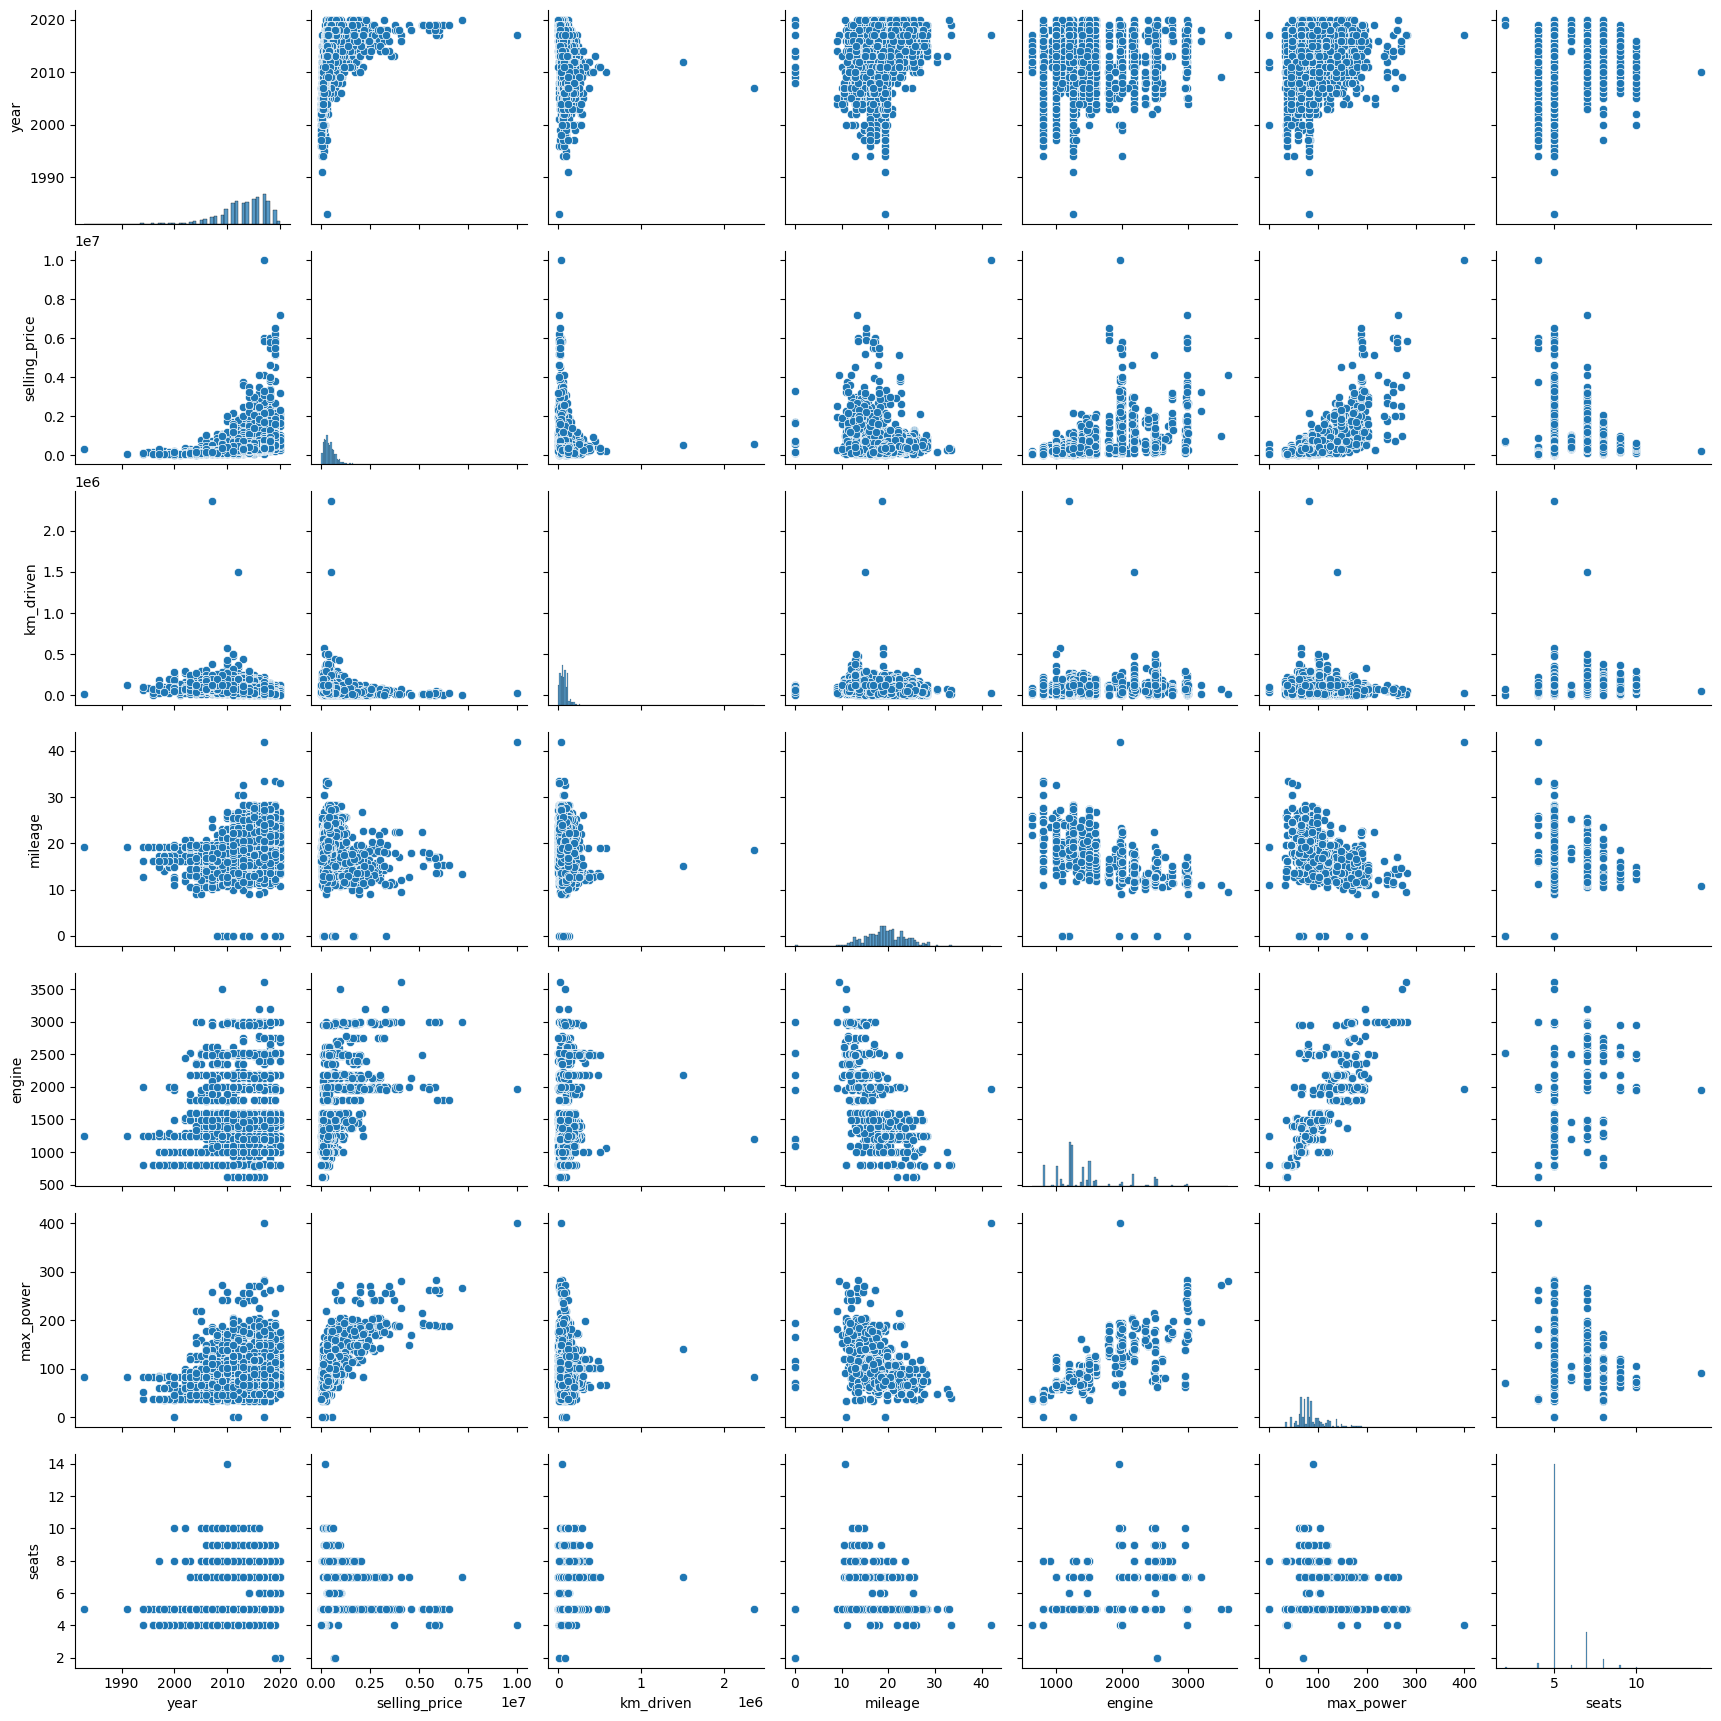

In [25]:
# Воспользуйтесь pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train

sns.pairplot(df_train)

По полученному графику ответьте на вопросы:

**Можно ли предположить на основе распределений связь признаков с целевой переменной?**

Думаю, что частично можно.
1. Максимальные стоимости на графике зависимости года выпуска от цены похожи на гиперболу.
2. Большая мощность двигателя может увеличивать стоимость автомобиля
3. Аналогично с признаком max_power
4. В основном большую стоимость могут иметь автомобили с количеством мест от 4 до 8

**Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**

Не вижу особых корреляций. Некоторые предположения перечислил в предыдущем вопросе. Далее, наверно, надо комбинировать признаки, чтобы найти более явные корреляции.

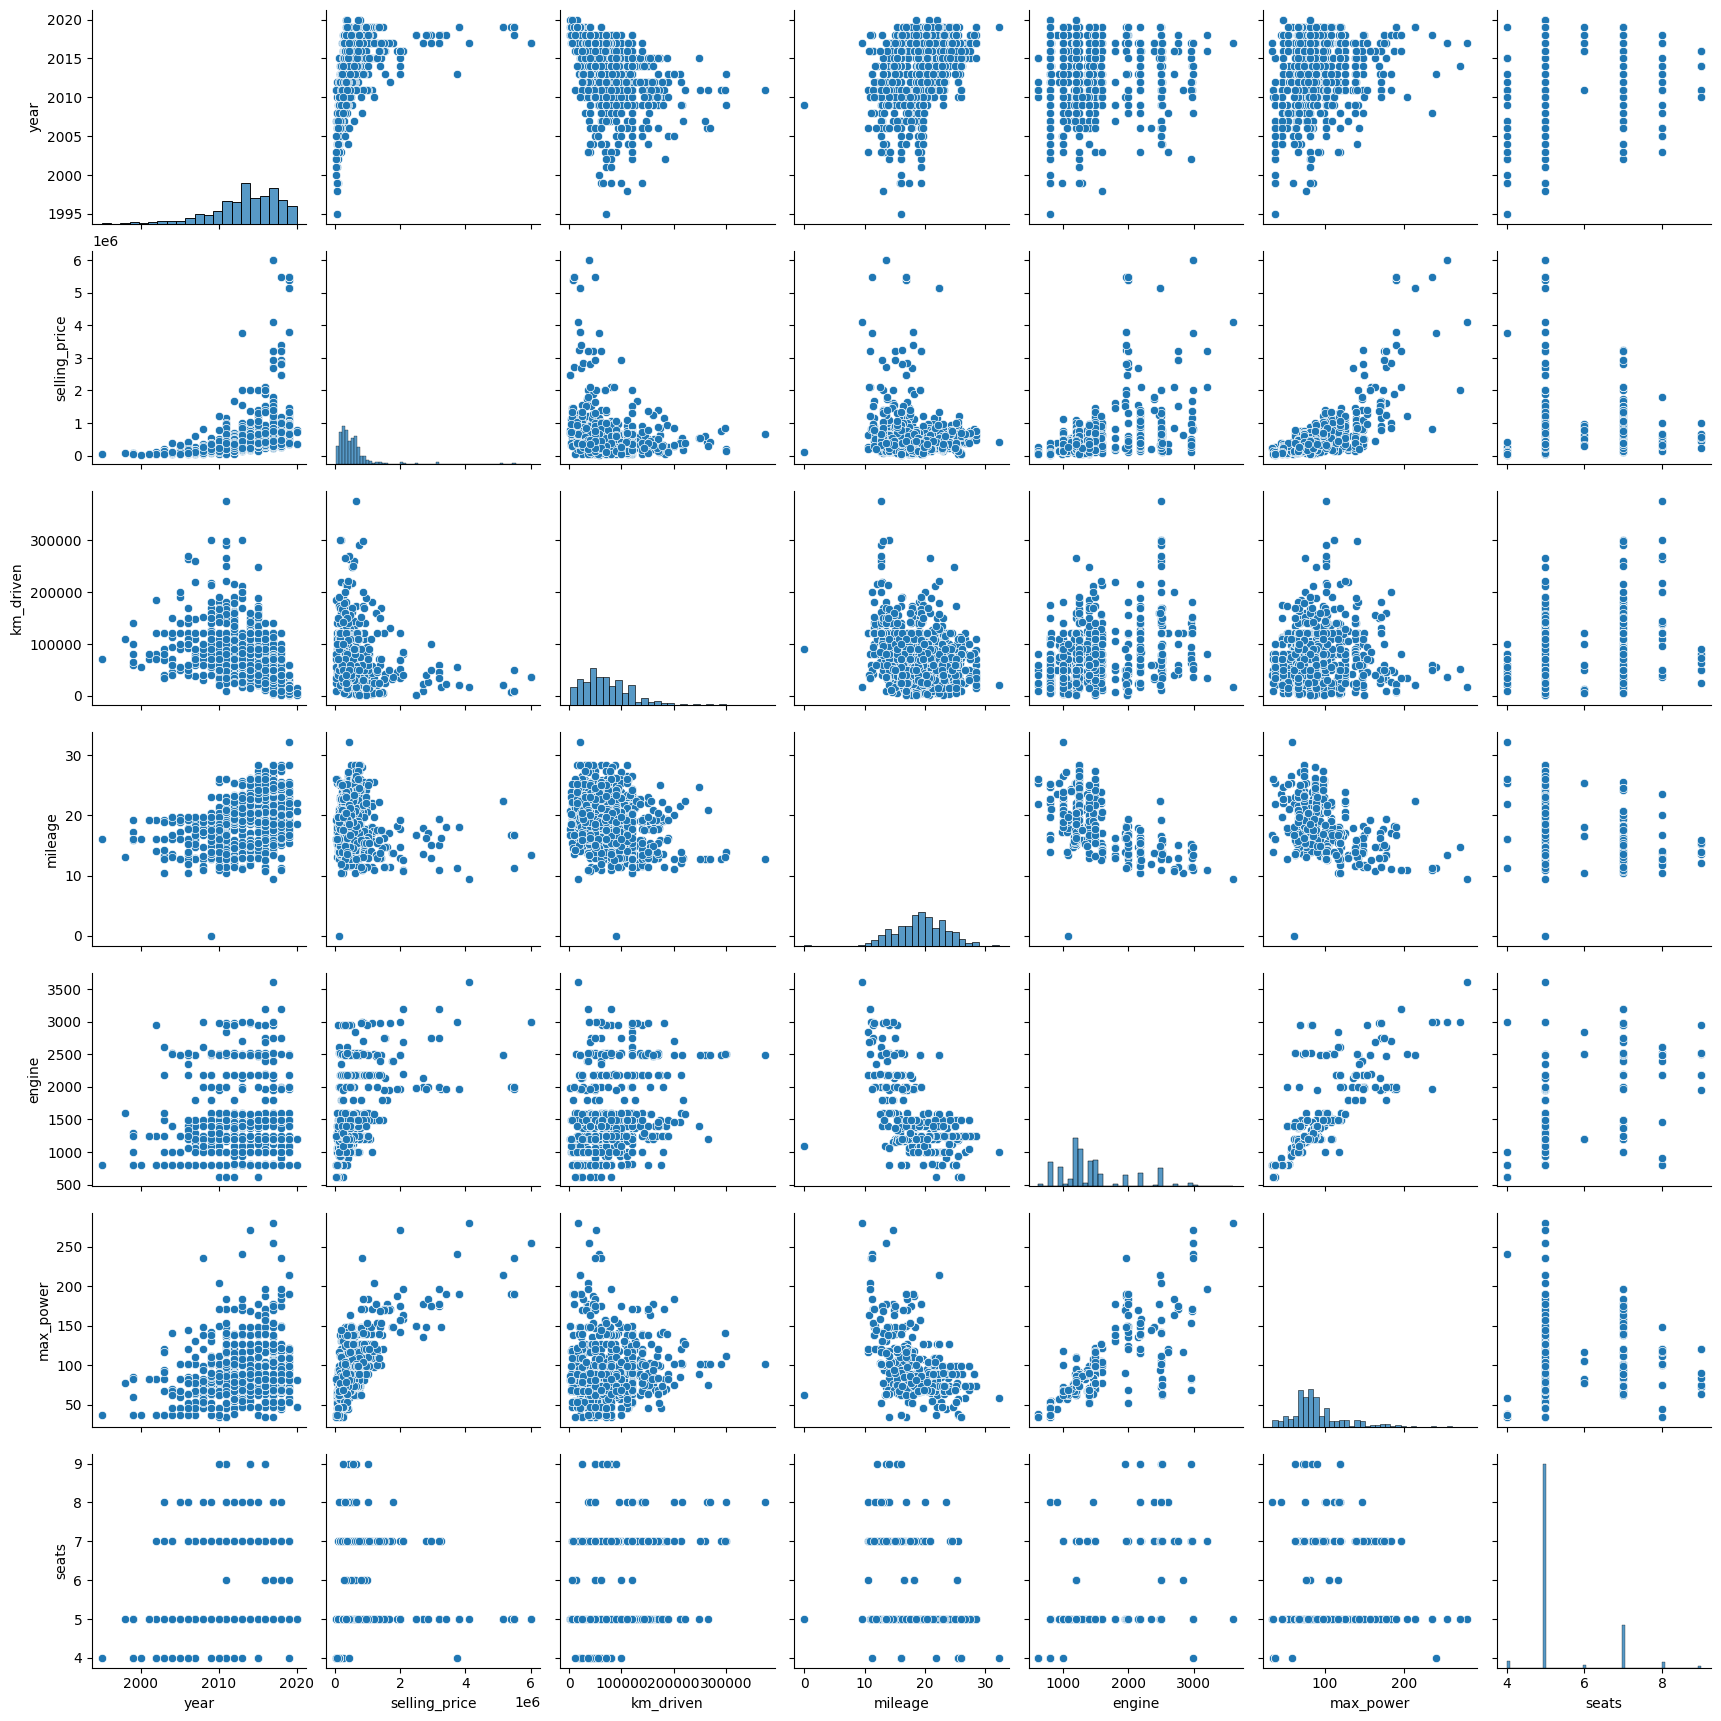

In [26]:
# Постройте pairplot по тестовым данным
sns.pairplot(df_test)

**Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"**

Кажется, что да

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [27]:
#  Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи pd.corr()
corr_train = df_train.select_dtypes(include=['number']).corr()
corr_train

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.342172  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104458  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182245  0.229766   
mileage        0.342172      -0.104458  -0.182245  1.000000 -0.572677   
engine         0.002819       0.447672   0.229766 -0.572677  1.000000   
max_power      0.157999       0.692666   0.024421 -0.372077  0.681213   
seats          0.041178       0.149953   0.192328 -0.450810  0.652172   

               max_power     seats  
year            0.157999  0.041178  
selling_price   0.692666  0.149953  
km_driven       0.024421  0.192328  
mileage        -0.372077 -0.450810  
engine          0.681213  0.652172  
max_power       1.000000  0.242738  
seats           0.242738  1.000000

<Axes: >

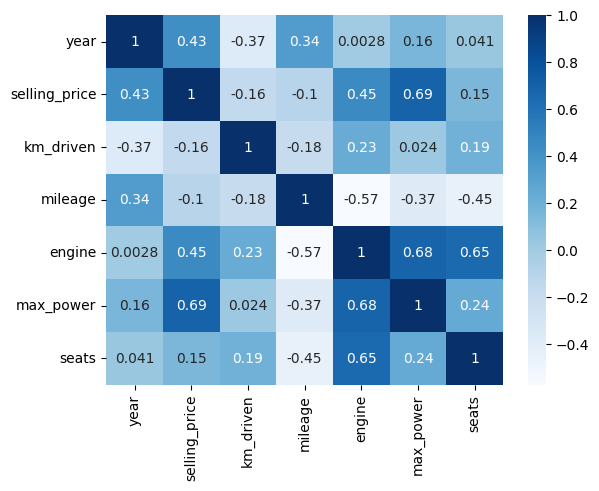

In [28]:
# По полученным корреляциям постройте тепловую карту (heatmap из бибилотеки seaborn)
sns.heatmap(corr_train, annot=True, cmap='Blues')

- [ ] Ответьте на вопросы:
 - **Какие 2 признака наименее скоррелированы между собой?**

   - engine и year

 - **Между какими наблюдается довольно сильная положительная линейная зависимость?**

   - selling_price и max_power

 - **Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**

    - Да, т.к. корреляция отрицательная (зависимость обратно пропорциональная)

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [29]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

In [30]:
# Здесь будем собирать модели и предсказания, чтобы работать с бизнес-метрикой в конце ноутбука
class ResultModels:
    def __init__(self):
        self.models = {}

    def add_result(self, name, model, predict):
        self.models[name] = {
            'model': model,
            'predict': predict
        }

    def __iter__(self):
        for name, data in self.models.items():
            yield name, data['model'], data['predict']

    def calculate_metrics(self, metrics, y_true):
        calc_result = []
        indeces = []
        for name, data in self.models.items():
            indeces.append(name)
            model_metrics = []
            for metric in metrics:
                curr_result = metric(y_true, data['predict'])
                model_metrics.append(curr_result)
            calc_result.append(model_metrics)
        
        columns = [metric.__name__ for metric in metrics]
        df_metrics = pd.DataFrame(
            calc_result,
            index=indeces,
            columns=columns)
        return df_metrics
    
results = ResultModels()

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [31]:
target_column = 'selling_price'

numeric_columns = df_train.describe().columns
df_train_numeric = df_train[numeric_columns]

y_train = df_train_numeric[target_column]
X_train = df_train_numeric.drop(target_column, axis=1)

In [32]:
X_train.describe()

year     km_driven      mileage       engine    max_power  \
count  5840.000000  5.840000e+03  5840.000000  5840.000000  5840.000000   
mean   2013.428425  7.395224e+04    19.428611  1429.448973    87.896741   
std       4.095622  6.007114e+04     3.986026   485.662834    31.660396   
min    1983.000000  1.000000e+00     0.000000   624.000000     0.000000   
25%    2011.000000  3.900000e+04    16.950000  1197.000000    68.000000   
50%    2014.000000  7.000000e+04    19.300000  1248.000000    81.860000   
75%    2017.000000  1.000000e+05    22.300000  1498.000000    99.000000   
max    2020.000000  2.360457e+06    42.000000  3604.000000   400.000000   

             seats  
count  5840.000000  
mean      5.426712  
std       0.982344  
min       2.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max      14.000000

In [33]:
df_test_numeric = df_test[numeric_columns]

y_test = df_test_numeric[target_column]
X_test = df_test_numeric.drop(target_column, axis=1)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def print_metrics(y_true, y_pred, add_new_line=True):
    print('Основные метрики:')
    print(f'R2:  {r2_score(y_true, y_pred):.4f}')
    print(f'MSE: {MSE(y_true, y_pred):.4f}')
    if add_new_line:
        print()

def fit_model_and_print_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_metrics(y_test, y_pred)
    return model

lr = LinearRegression()
lr = fit_model_and_print_metrics(lr, X_train, y_train, X_test, y_test)
results.add_result('LinearRegression', lr, lr.predict(X_test))

Основные метрики:
R2:  0.5937
MSE: 233550462870.9787



Выводы:
1. Метрика R2 невысокая, но предсказывает значения чуть лучше, чем выдавая просто среднее.
2. MSE кажется огромнейшей, но я не знаю, что об этом сказать (и что с этим сделать)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
lr_scaled = fit_model_and_print_metrics(
    LinearRegression(), 
    X_train_scaled, y_train, 
    X_test_scaled, y_test)
results.add_result('LinearRegression with StandardScaler', 
                   lr_scaled, lr_scaled.predict(X_test_scaled))

Основные метрики:
R2:  0.5937
MSE: 233550462870.9736



### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [37]:
def print_coef_table(columns, coefs, add_new_line=True):
    print('Коэффициенты модели:')
    width = len(max(columns, key=lambda x: len(x)))
    for col, coef in zip(columns, coefs):
        print(f'{col:{width}}: {coef:15.4f}')
    if add_new_line:
        print()

print_coef_table(X_train.columns, lr_scaled.coef_)

Коэффициенты модели:
year     :     152483.6533
km_driven:     -44289.0713
mileage  :      28431.2378
engine   :      60668.5147
max_power:     322550.4185
seats    :     -22522.3372



`Наиболее информативным признаком оказался max_power`

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [38]:
from sklearn.linear_model import Lasso

lasso = fit_model_and_print_metrics(Lasso(), 
                                    X_train_scaled, y_train, 
                                    X_test_scaled, y_test)
results.add_result('Lasso', lasso, lasso.predict(X_test_scaled))

Основные метрики:
R2:  0.5937
MSE: 233551136684.2553



In [39]:
print_coef_table(X_train.columns, lasso.coef_)

Коэффициенты модели:
year     :     152483.4691
km_driven:     -44287.9418
mileage  :      28429.3574
engine   :      60663.6640
max_power:     322551.3210
seats    :     -22519.4501



`L1-регуляризация не занулила веса. Думаю, это из-за того, что все значения достаточно большие и примерно одного порядка (находятся примерно на одинаковом расстоянии от нулей)`

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [41]:
gs_lasso = GridSearchCV(
    estimator=Lasso(),
    param_grid={
        # 'alpha': np.linspace(0.1, 100000, 1000)
        'alpha': np.logspace(-2, 5, 100)
        },
    cv=10,
    # scoring='neg_mean_squared_error',
    scoring='r2'
    )

gs_lasso.fit(X_train_scaled, y_train)
gs_lasso_best_model = gs_lasso.best_estimator_
gs_lasso_best_model_predict = gs_lasso_best_model.predict(X_test_scaled)

print(f'Лучшие параметры: {gs_lasso.best_params_}')
print(f'Лучшая оценка: {gs_lasso.best_score_}')
print()
print_coef_table(X_train.columns, gs_lasso_best_model.coef_)
print_metrics(y_test, gs_lasso_best_model_predict)
print(f'Количество обученных моделей: {len(gs_lasso.cv_results_['params']) * gs_lasso.cv}')

results.add_result('Lasso (GridSearchCV)', 
                   gs_lasso_best_model, gs_lasso_best_model_predict)

Лучшие параметры: {'alpha': np.float64(27185.8824273294)}
Лучшая оценка: 0.5745845344537288

Коэффициенты модели:
year     :     145177.8984
km_driven:     -15336.8905
mileage  :          0.0000
engine   :          0.0000
max_power:     321094.3499
seats    :         -0.0000

Основные метрики:
R2:  0.5635
MSE: 250898615981.7867

Количество обученных моделей: 1000


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [42]:
gs_elastic = GridSearchCV(
    estimator=ElasticNet(),
    param_grid={
        'alpha': np.linspace(0, 1, 11),
        'l1_ratio': np.linspace(0, 1, 11),
        },
    cv=10,
    scoring='r2')

gs_elastic.fit(X_train_scaled, y_train)
gs_elastic_best_model = gs_elastic.best_estimator_
gs_elastic_best_model_predict = gs_elastic_best_model.predict(X_test_scaled)

print(f'Лучшие параметры: {gs_elastic.best_params_}')
print(f'Лучшая оценка: {gs_elastic.best_score_}')
print()
print_coef_table(X_train.columns, gs_elastic_best_model.coef_)
print_metrics(y_test, gs_elastic_best_model_predict)
print(f'Количество обученных моделей: {len(gs_elastic.cv_results_['params']) * gs_elastic.cv}')

results.add_result('ElasticNet (GridSearchCV)', gs_elastic_best_model, gs_elastic_best_model_predict)

Лучшие параметры: {'alpha': np.float64(0.7000000000000001), 'l1_ratio': np.float64(0.8)}
Лучшая оценка: 0.5762594827777099

Коэффициенты модели:
year     :     142825.5991
km_driven:     -46280.5724
mileage  :      20567.6446
engine   :      81776.6451
max_power:     269220.4905
seats    :     -22900.8803

Основные метрики:
R2:  0.5632
MSE: 251090154128.7783

Количество обученных моделей: 1210


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [43]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [44]:
assert X_train_cat.shape == (5840, 10)

In [45]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориальные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [46]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = pd.get_dummies(X_train_cat, drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True)

In [47]:
scaler.fit(X_train_cat)
X_train_cat_scaled = scaler.transform(X_train_cat)
X_test_cat_scaled = scaler.transform(X_test_cat)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [49]:
gs_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid={
        # 'alpha': np.linspace(0.1, 1000, 50)
        'alpha': np.logspace(-2, 3, 100)
        },
    cv=10,
    scoring='r2')

gs_ridge.fit(X_train_cat_scaled, y_train)
gs_ridge_best_model = gs_ridge.best_estimator_
gs_ridge_best_model_predict = gs_ridge_best_model.predict(X_test_cat_scaled)

print(f'Лучшие параметры: {gs_ridge.best_params_}')
print(f'Лучшая оценка: {gs_ridge.best_score_}')
print()
# print_coef_table(X_train.columns, gs_ridge_best_model.coef_)
print_metrics(y_test, gs_ridge_best_model_predict)
print(f'Количество обученных моделей: {len(gs_ridge.cv_results_['params']) * gs_ridge.cv}')

results.add_result('Ridge (GridSearchCV)', 
                   gs_ridge_best_model, gs_ridge_best_model_predict)

Лучшие параметры: {'alpha': np.float64(890.2150854450392)}
Лучшая оценка: 0.6044349741379407

Основные метрики:
R2:  0.6003
MSE: 229738033341.0331

Количество обученных моделей: 1000


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [50]:
def business_metric(y_true, y_pred):
    percent = 0.1
    relations = y_true / y_pred
    count = (np.abs(relations - 1) <= percent).sum()
    return float(count) / len(y_pred)

business_metric(y_test, gs_ridge_best_model.predict(X_test_cat_scaled))

0.249

In [51]:
for name, model, predict in results:
    bm = business_metric(y_test, predict)
    print(f'{bm:.4f} -> {name}')

0.2240 -> LinearRegression
0.2240 -> LinearRegression with StandardScaler
0.2240 -> Lasso
0.2330 -> Lasso (GridSearchCV)
0.2530 -> ElasticNet (GridSearchCV)
0.2490 -> Ridge (GridSearchCV)


In [52]:
base_metrics = [r2_score, MSE, business_metric]
metric_results = results.calculate_metrics(base_metrics, y_test)
metric_results.sort_values('business_metric', ascending=False)

r2_score  mean_squared_error  \
ElasticNet (GridSearchCV)             0.563191        2.510902e+11   
Ridge (GridSearchCV)                  0.600336        2.297380e+11   
Lasso (GridSearchCV)                  0.563524        2.508986e+11   
LinearRegression                      0.593704        2.335505e+11   
LinearRegression with StandardScaler  0.593704        2.335505e+11   
Lasso                                 0.593703        2.335511e+11   

                                      business_metric  
ElasticNet (GridSearchCV)                       0.253  
Ridge (GridSearchCV)                            0.249  
Lasso (GridSearchCV)                            0.233  
LinearRegression                                0.224  
LinearRegression with StandardScaler            0.224  
Lasso                                           0.224

`Лучше всего бизнес-задачу решает ElasticNet`

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.